# Reinforcement Learning (Q-learning)
This notebook contains code on running the Q-learning algorithm to optimize repair protocols for an aging network. This is illustrated in the test example. Additionally, there are code blocks for visualizing the Q-learning results (i.e. optimized Q-matrix) that are saved in CSV files. These were obtained from runs submitted to the Harvard Odyssey2 cluster. Included in this notebook is the code for generating Figure 3b and Figure 3c.

In [1]:
from q_learning import *

## Test run for Q-learning

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:31<00:00,  3.19s/it]


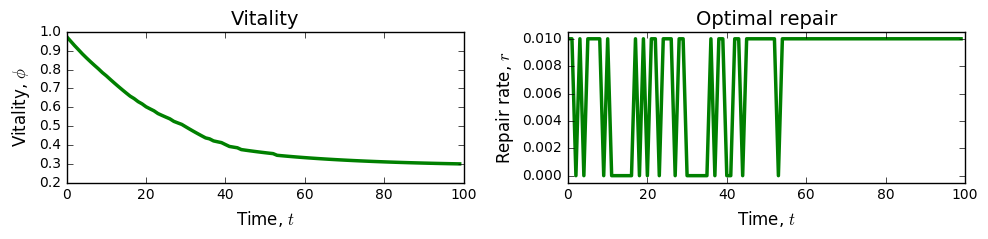

In [3]:
f = 0.025
r = 0.01
alpha = 10
gamma = 0.975
actions = [0, r]

exp_name = 'results/'+'_f'+str(f)+'_r'+str(r)+'_a'+str(alpha)+'_g'+str(gamma)+'_N100_T100_15000ep_lr01_expD'
Q = QLearning_v_fast_cluster (actions, pop_size=1, num_episodes=10, T=100, N=100, f=f, alpha=alpha, p_explore=0.5, 
                  learning_rate=0.1, discount=gamma, decay=[0.0005,0.0005], I=0.25, num_nets=5)

visualizeQ_v(Q, actions, exp_name, N=100, T=100)

## Figure 4b: Converged Q-learning protocols closely match analytic optimal control

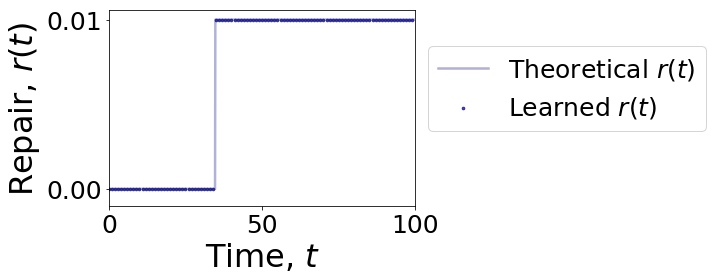

In [2]:
# Matching
path = '/Users/edsun/Desktop/RESEARCH/Mathematical_Aging/optimal_control_of_aging_in_complex_systems/ReinforcementLearning/f0025_r001_g0975_a10_15000ep_decay00005'
plotMatchingAVG(path+'/Failure','_f0.03666666666666667_r0.01_a10_g0.975_N100_T100_15000ep_lr01_expD.txt',
            'MATCHING', f=0.03667, r=0.01, alpha=10, gamma=0.975, d=0, N=100)

## Figure 4c: Converged protocol matches optimal control for variable costs of repair $\alpha$
### Along with additional figures for variable $f$ and $\gamma$

C:\Users\edsun\Desktop\RESEARCH\Mathematical_Aging\optimal_control_of_aging_in_complex_systems\q_learning.py:1071: RuntimeWarning: Mean of empty slice
  cT1.append(np.nanmean(c_list))
C:\Users\edsun\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3405: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
C:\Users\edsun\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


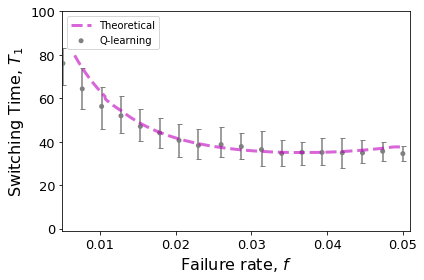

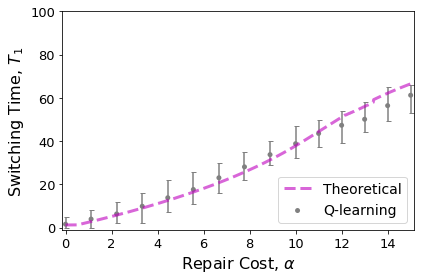

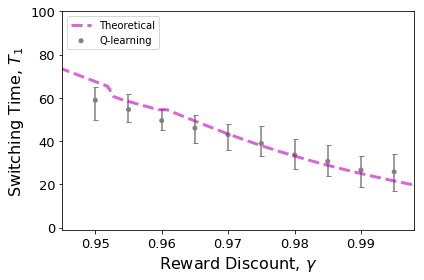

In [2]:
path = '/Users/edsun/Desktop/RESEARCH/Mathematical_Aging/optimal_control_of_aging_in_complex_systems/ReinforcementLearning/f0025_r001_g0975_a10_15000ep_decay00005'
a,b = plotResultsAVG (directory=path+'/Failure',
             param='failure', p_range=np.concatenate((np.linspace(0,0.023,10),np.linspace(0.026,0.05,10))), 
             repair_list=[0,0.01], N=100, T=100, plot='NEWvaryFailure', soln_type='numeric', CI=75, fine_res=True, binning=False)
a,b = plotResultsAVG (directory=path+'/Alpha',
             param='alpha', p_range=np.concatenate((np.linspace(0,10,10),np.linspace(11,20,10))), 
             repair_list=[0,0.01], N=100, T=100, plot='NEWvaryAlpha', soln_type='numeric', CI=75, fine_res=True, binning=False, )
a,b = plotResultsAVG (directory=path+'/Gamma',
             param='gamma', p_range=np.concatenate((np.linspace(0.9,0.95,10),np.linspace(0.955,1,10))), 
             repair_list=[0,0.01], N=100, T=100, plot='NEWvaryGamma', soln_type='numeric', CI=75, fine_res=True, binning=False)